PARAS

In [ ]:
#sab modules import garne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pokemon.csv')
#df now holds the pokemon wala file
df
#printing file

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
!pip install ydata-profiling
#analysis of a DataFrame while allowing the data analysis to be exported in different formats such as html and jsonc

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e2fef3bccce00799a21909e00c54c0f135808f6f00e810d7249bb8354d93e181
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.info() #to check columns, data types, and non-null counts.
df.head() #to view the first few rows.
df.describe() #for numerical feature statistics.
df.value_counts() #for categorical feature distributions

NameError: name 'df' is not defined

In [ ]:
df.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


In [ ]:
df.duplicated().sum()

np.int64(0)

MAYA

In [ ]:
# Fill missing values in 'Type 2' for consistency
df['Type 2'] = df['Type 2'].fillna('None')


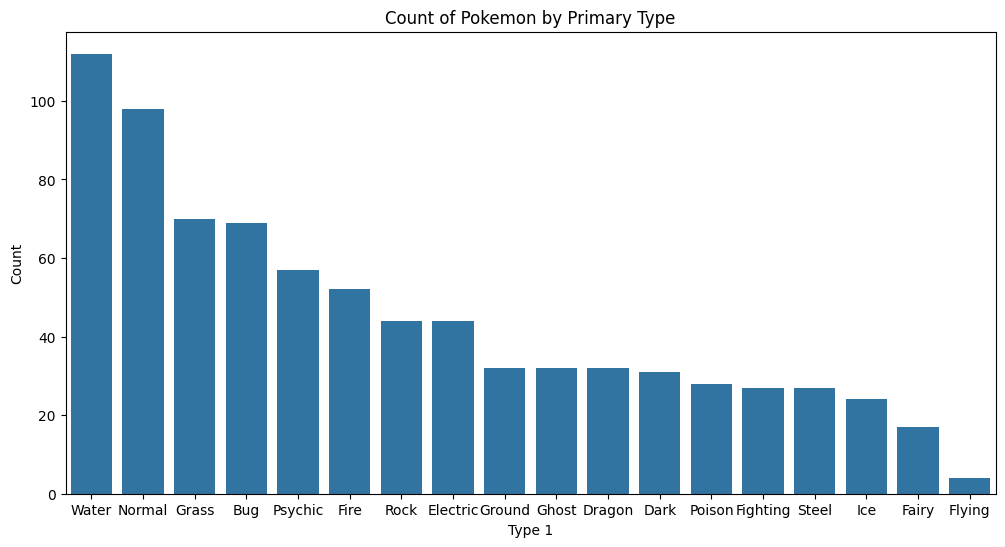

In [ ]:
# Count of each Pokemon primary type (Type 1)
plt.figure(figsize=(12, 6))
sns.countplot(x='Type 1', data=df, order=df['Type 1'].value_counts().index)
plt.title("Count of Pokemon by Primary Type")
plt.xlabel("Type 1")
plt.ylabel("Count")
plt.show()


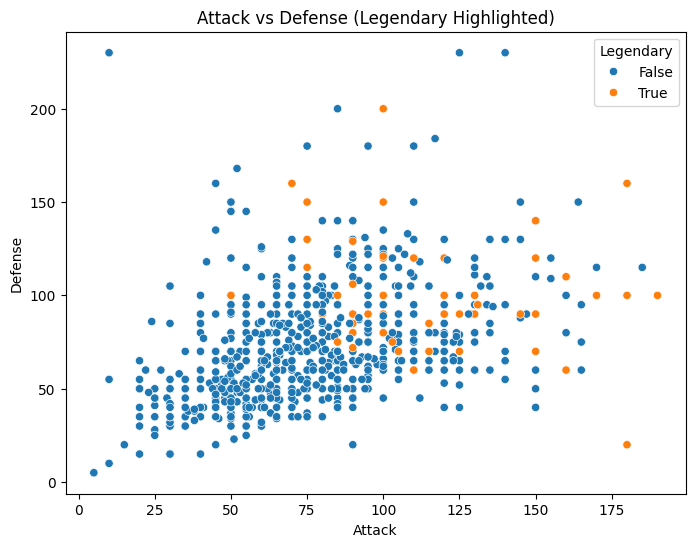

In [ ]:
# Compare Attack and Defense, highlighting Legendary Pokemon
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attack', y='Defense', hue='Legendary', data=df)
plt.title("Attack vs Defense (Legendary Highlighted)")
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show()


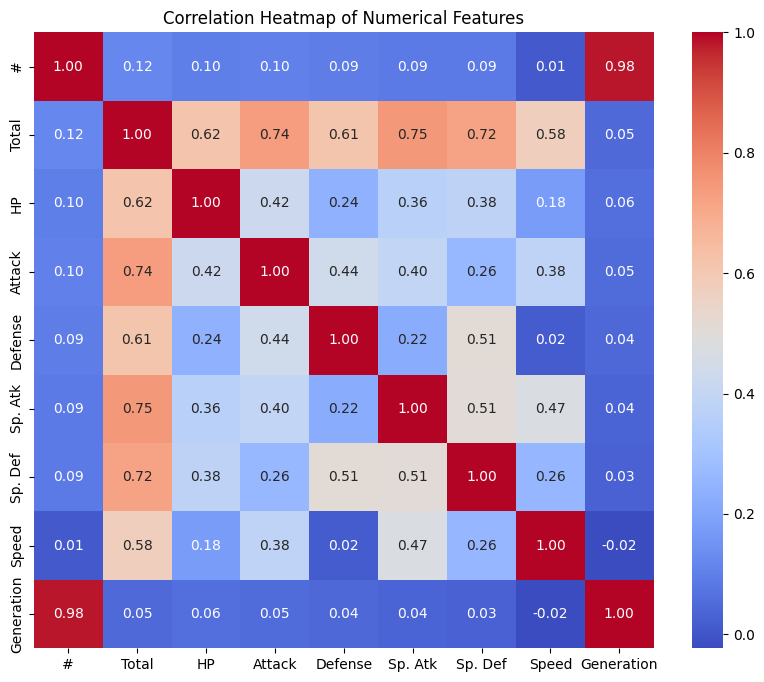

In [ ]:
# Show correlation between all numeric features
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


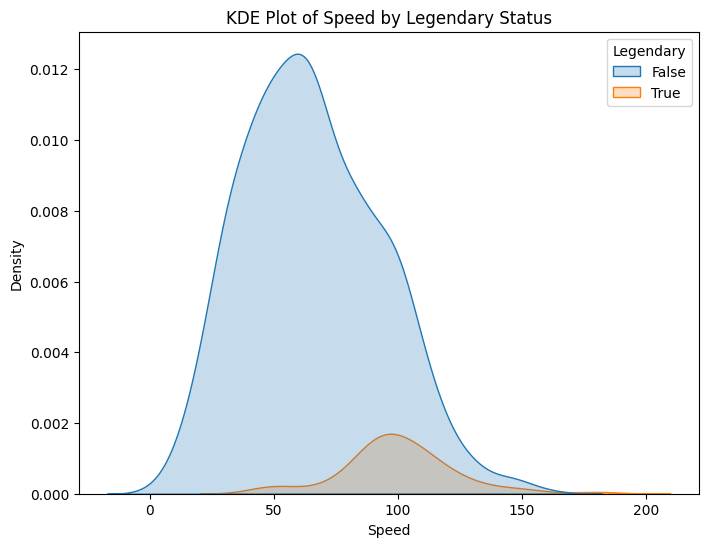

In [ ]:
#KDEplot for Show smooth distribution comparison
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Speed', hue='Legendary', fill=True)
plt.title("KDE Plot of Speed by Legendary Status")
plt.xlabel("Speed")
plt.ylabel("Density")

plt.show()


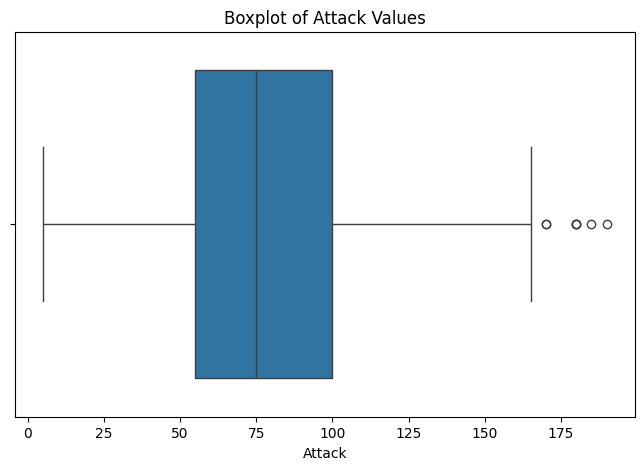

In [ ]:
# Boxplot to visualize outliers in the attack
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Attack'])
plt.title("Boxplot of Attack Values")
plt.xlabel("Attack")
plt.show()


In [ ]:
#Handle outliers in attack using IQR
q1 = df['Attack'].quantile(0.25)
q3 = df['Attack'].quantile(0.75)
iqr = q3 - q1
df = df[(df['Attack'] >= q1 - 1.5 * iqr) & (df['Attack'] <= q3 + 1.5 * iqr)]


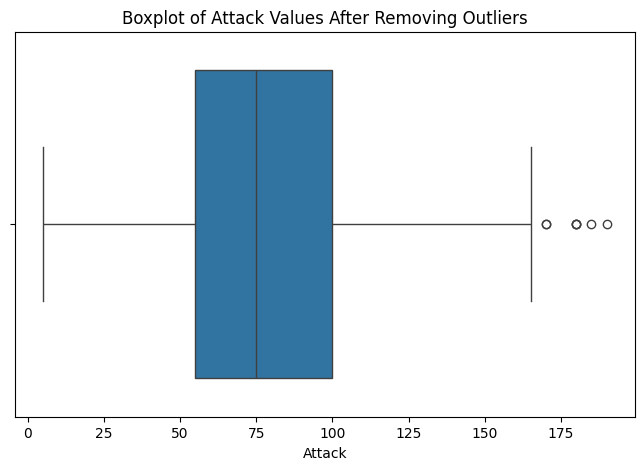

In [ ]:
#Boxplot fter removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Attack'])
plt.title("Boxplot of Attack Values After Removing Outliers")
plt.xlabel("Attack")
plt.show()


KAILASH


FEATURE ENGINEERING


In [ ]:
print(db['Speed'].describe())
#as reference

count    800.000000
mean      68.277500
std       29.060474
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64


In [ ]:
#hp binning
#"hp_bin" bhanne naya column banaune then file bata stat value
#wise categorize garne using fuction cut().
#x = db["hp"] tells the fuction to which column to categorize from, bin classifies the category and label
#is the classification
df["hp_bin"] = pd.cut(x=df["HP"], bins=[0, 50, 80, 150,200,265],
                      labels = ["ko'd by a breeze","weak","medium","tank", "THE TANK"]
)
print(df[['Name','HP','hp_bin']])

                      Name  HP            hp_bin
0                Bulbasaur  45  ko'd by a breeze
1                  Ivysaur  60              weak
2                 Venusaur  80              weak
3    VenusaurMega Venusaur  80              weak
4               Charmander  39  ko'd by a breeze
..                     ...  ..               ...
795                Diancie  50  ko'd by a breeze
796    DiancieMega Diancie  50  ko'd by a breeze
797    HoopaHoopa Confined  80              weak
798     HoopaHoopa Unbound  80              weak
799              Volcanion  80              weak

[800 rows x 3 columns]


<ipython-input-6-62d50e23d6dc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'hp_bin', y = 'HP', palette = 'coolwarm')


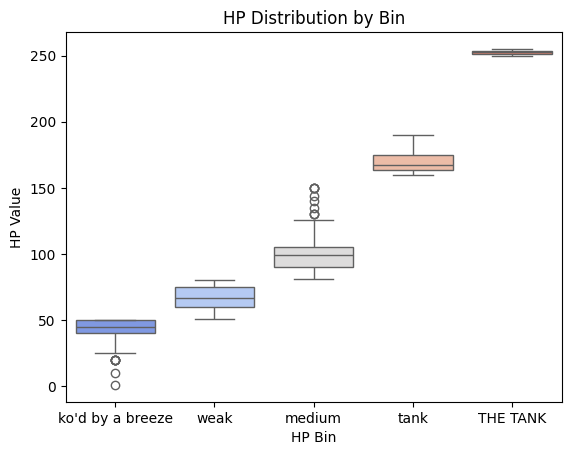

In [ ]:
#visualize results
sns.boxplot(data = df, x = 'hp_bin', y = 'HP', palette = 'coolwarm')
plt.title('HP Distribution by Bin')
plt.xlabel('HP Bin')
plt.ylabel('HP Value')
plt.show()


                      Name  Speed   speed_bin
0                Bulbasaur     45     walkin'
1                  Ivysaur     60     walkin'
2                 Venusaur     80   sprinting
3    VenusaurMega Venusaur     80   sprinting
4               Charmander     65   sprinting
..                     ...    ...         ...
795                Diancie     50     walkin'
796    DiancieMega Diancie    110  usain bolt
797    HoopaHoopa Confined     70   sprinting
798     HoopaHoopa Unbound     80   sprinting
799              Volcanion     70   sprinting

[800 rows x 3 columns]


<ipython-input-7-f4ba2dcee3b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'speed_bin', y = 'Speed', palette = 'coolwarm')


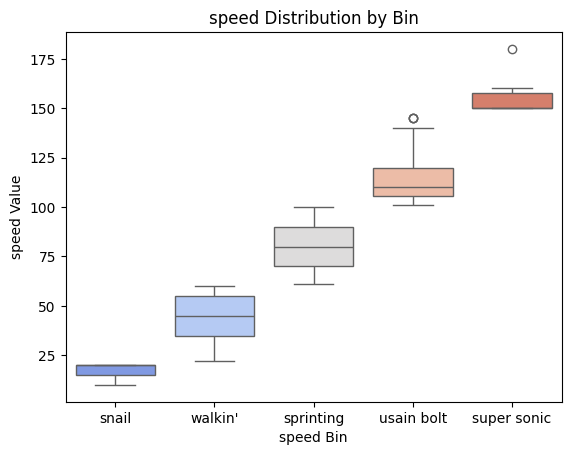

In [ ]:
#speed binning

df["speed_bin"]= pd.cut(x= df["Speed"], bins = [5,20,60,100,145,180],
                        labels = ["snail","walkin'","sprinting","usain bolt","super sonic"])
print(df[["Name", "Speed", "speed_bin"]])
sns.boxplot(data = df, x = 'speed_bin', y = 'Speed', palette = 'coolwarm')
plt.title('speed Distribution by Bin')
plt.xlabel('speed Bin')
plt.ylabel('speed Value')
plt.show()



In [ ]:
#making an A/D ratio
df["A/D Ratio"] = df["Attack"]/df["Defense"]
print(df[["Name", "Attack", "Defense", "A/D Ratio"]].head(15))

                         Name  Attack  Defense  A/D Ratio
0                   Bulbasaur      49       49   1.000000
1                     Ivysaur      62       63   0.984127
2                    Venusaur      82       83   0.987952
3       VenusaurMega Venusaur     100      123   0.813008
4                  Charmander      52       43   1.209302
5                  Charmeleon      64       58   1.103448
6                   Charizard      84       78   1.076923
7   CharizardMega Charizard X     130      111   1.171171
8   CharizardMega Charizard Y     104       78   1.333333
9                    Squirtle      48       65   0.738462
10                  Wartortle      63       80   0.787500
11                  Blastoise      83      100   0.830000
12    BlastoiseMega Blastoise     103      120   0.858333
13                   Caterpie      30       35   0.857143
14                    Metapod      20       55   0.363636


<ipython-input-9-9845112715db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'A/D Ratio', palette = 'coolwarm')


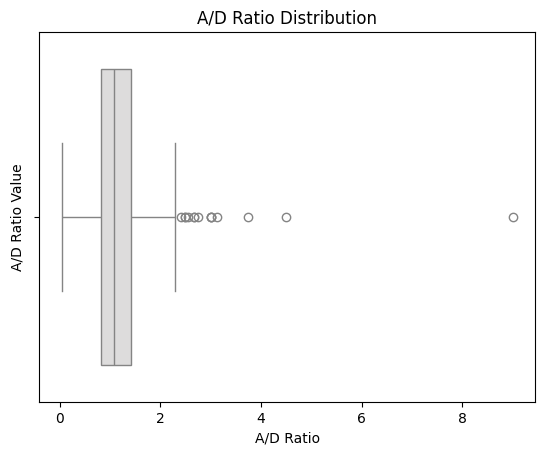

In [ ]:
#visualizing a/d ratio
sns.boxplot(data = df, x = 'A/D Ratio', palette = 'coolwarm')
plt.title('A/D Ratio Distribution')
plt.xlabel('A/D Ratio')
plt.ylabel('A/D Ratio Value')
plt.show()

In [ ]:
df.describe()
print(df['Total'].std())


119.963039755519


In [ ]:
#Traditional programming: ou give th rules and data
#traditional programming
def is_even(num):
  return num % 2 == 0

print(is_even(4949344564335678765))
#ML thinking
#DAta: [2,4,6,8,10] even numbers
#Data: [1,3,5,7,9] #odd numbers

#Goal: let the ml model find the patterns

False


predicting ordd vs even using decision tree

In [ ]:
#importing libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#preparing data
X = pd.DataFrame({'number':[1,2,3,4,5,6,7,8,9,10]})
y = ['odd','even','odd','even','odd','even','odd','even','odd','even']

#creating model
model = DecisionTreeClassifier()

#training model
model.fit(X,y)



DecisionTreeClassifier()

In [ ]:
print(model.predict([[238
                      ]]))